In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
np.random.seed(42)
m = 100
X = 2*np.random.rand(m, 1)
y = 4+ 2*X + np.random.randn(m, 1)

In [ ]:
X

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516],
       [0.04116899],
       [1.9398197 ],
       [1.66488528],
       [0.42467822],
       [0.36364993],
       [0.36680902],
       [0.60848449],
       [1.04951286],
       [0.86389004],
       [0.58245828],
       [1.22370579],
       [0.27898772],
       [0.5842893 ],
       [0.73272369],
       [0.91213997],
       [1.57035192],
       [0.39934756],
       [1.02846888],
       [1.18482914],
       [0.09290083],
       [1.2150897 ],
       [0.34104825],
       [0.13010319],
       [1.89777107],
       [1.93126407],
       [1.6167947 ],
       [0.60922754],
       [0.19534423],
       [1.36846605],
       [0.88030499],
       [0.24407647],
       [0.99035382],
       [0.06877704],
       [1.8186408 ],
       [0.51755996],
       [1.32504457],
       [0.62342215],
       [1.040

In [ ]:
y

array([[4.78050942],
       [6.53783902],
       [5.77834386],
       [5.70588766],
       [5.21960375],
       [4.56128127],
       [4.52655015],
       [6.48790343],
       [5.43102819],
       [5.49312507],
       [4.33092044],
       [6.10104099],
       [6.59458293],
       [5.2327986 ],
       [4.99705369],
       [5.23826961],
       [5.41215656],
       [5.23608292],
       [5.75644904],
       [5.12180052],
       [6.03114594],
       [5.17507902],
       [4.90229277],
       [4.84277561],
       [5.14007513],
       [5.99745971],
       [5.21736233],
       [5.88919946],
       [5.19178127],
       [4.60364813],
       [5.63250071],
       [4.56315606],
       [4.24996855],
       [6.23538625],
       [6.87417377],
       [5.93999763],
       [5.12801816],
       [4.89836319],
       [5.73209566],
       [5.85208707],
       [5.20652376],
       [5.24213612],
       [4.56602555],
       [6.11951911],
       [4.80240046],
       [5.36193152],
       [5.23298649],
       [5.542

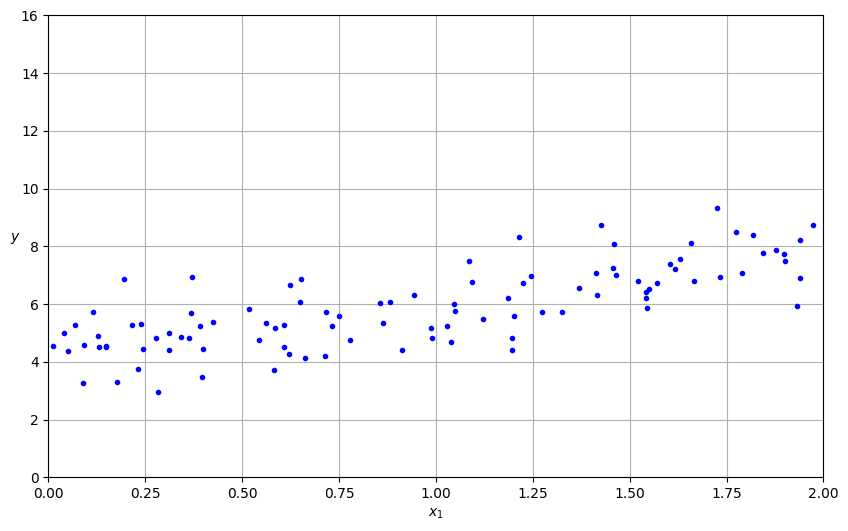

In [ ]:
plt.figure(figsize = (10, 6))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 2, 0, 16])
plt.grid()
plt.show()

In [ ]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)

y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [7.75532293]])

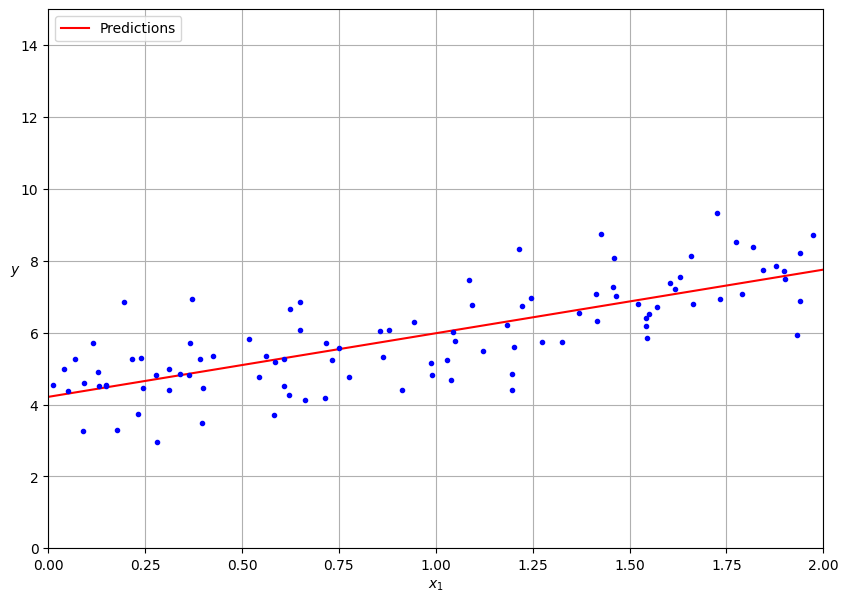

In [ ]:
plt.figure(figsize = [10, 7])
plt.plot(X_new, y_predict, 'r', label = 'Predictions')
plt.plot(X, y, 'b.')

plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation = 0)
plt.axis([0, 2, 0 ,15])
plt.grid()
plt.legend(loc = 'upper left')

plt.show()

In [ ]:
y = y.reshape(100, 1)     # X-i da ele

In [ ]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)            # wx + b de b olsun deye

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y       # X transpose times  X and then inverse it and dot product X transpose and y

In [ ]:
theta_best

array([[4.21509616],
       [1.77011339]])

batch

In [ ]:
X_b[0]

array([1.        , 0.74908024])

In [ ]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2,1)

for epoch in range(n_epochs):
  gradient = 1 / m * 2 * X_b.T @ (X_b @ theta - y)
  theta = theta - eta *gradient

In [ ]:
theta

array([[4.21509616],
       [1.77011339]])

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-5, penalty = None, eta0 = 0.01,
                       n_iter_no_change = 100, random_state=42)
sgd_reg.fit(X, y.ravel())       #ravel reduces dimension to 1D

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [ ]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21154695]), array([1.77379754]))

stoc

In [ ]:
np.random.seed(42)

eta = 0.1
m = len(X_b)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @(xi @ theta - yi)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.17686315],
       [1.85986577]])

mini batch

In [ ]:
from math import ceil

n_epochs = 50
eta = 0.1
m = len(X_b)
minibatch_size = 20
n_bathces_per_epoch = ceil(m / minibatch_size)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
  shuffled_indices = np.random.permutation(m)
  X_b_shuffled = X_b[shuffled_indices]
  y_shuffled = y[shuffled_indices]
  for iteration in range(0, n_bathces_per_epoch):
    idx = iteration * minibatch_size
    xi = X_b_shuffled[idx : idx + minibatch_size]
    yi = y_shuffled[idx : idx + minibatch_size]
    gradients = 2 / minibatch_size * xi.T @(xi @theta - yi)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.22015491],
       [1.77052006]])